In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")

df = pd.read_csv('data/job_listings.csv')

df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [3]:
df.shape

(426, 3)

In [4]:
# making it pretty
soup = BeautifulSoup(df['description'][0], 'html.parser')

print(soup.prettify())

b"
<div>
 <div>
  Job Requirements:
 </div>
 <ul>
  <li>
   <p>
    \nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them
   </p>
   \n
  </li>
  <li>
   <p>
    Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)
   </p>
   \n
  </li>
  <li>
   <p>
    Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R
   </p>
   \n
  </li>
  <li>
   <p>
    Ability to communicate Model findings to both Technical and Non-Technical stake holders
   </p>
   \n
  </li>
  <li>
   <p>
    Hands on experience in SQL/Hive or similar programming language
   </p>
   \n
  </li>
  <li>
   <p>
    Must show past work via GitHub, Kaggle or any other published article
   </p>
   \n
  </li>
  <

In [5]:
soup = BeautifulSoup(df['description'][0], 'html.parser')
text = soup.get_text()
print(text)

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [9]:
#removing html from all the description rows

df['description'] = [BeautifulSoup(text).get_text() for text in df['description'] ]
df.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


In [ ]:
#definitely could be cleaned some more

STOP_WORDS = nlp.Defaults.stop_words.union(["b"])

## 2) Use Spacy to tokenize the listings 

In [13]:
#using spacy
import spacy
from spacy.tokenizer import Tokenizer

#df['description'] 

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Tokenizer Pipe
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['description'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

df['tokens'].head()



0    [b"Job, Requirements:\nConceptual, understandi...
1    [b'Job, Description\n\nAs, a, Data, Scientist,...
2    [b'As, a, Data, Scientist, you, will, be, work...
3    [b'$4,969, -, $6,756, a, monthContractUnder, t...
4    [b'Location:, USA, \xe2\x80\x93, multiple, loc...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [20]:
# grabbing all the feature names

from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
desc = df.description

# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(desc)

# transform text
dtm = vect.transform(desc)

print(vect.get_feature_names())

['00', '000', '02115', '03', '0356', '04', '062', '06366', '08', '10', '100', '1000', '1001', '1008', '100k', '100x', '105', '1079302', '1082692', '10b', '10ms', '10x', '11', '110k', '112', '114157802', '12', '120', '125', '126', '130', '1315', '1324b', '138', '14', '140', '15', '150', '15000', '159m', '16', '1605', '165', '169334br', '17', '170', '17b', '18', '180', '180008jq', '18b', '19', '190', '190007ji', '19000bn4', '19000c1k', '19004162', '1901744', '1904', '1904labs', '1905', '19050', '1938', '1944', '1967', '1971', '1975', '1979', '1988', '199', '1994', '1999', '1b', '1st', '1strategy', '1tb', '20', '200', '2000', '200020183', '200041695', '2004', '2008', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2050', '21', '210', '2145', '2272', '24', '24m', '25', '250', '25256', '26', '260', '27', '28', '2nd', '2x', '30', '300', '30328', '30bn', '30k', '31', '317', '320', '3201', '33', '33051', '338', '35', '350', '3535', '35million', '36', '360', '36

In [45]:
# counting the names

X_train_counts = vect.fit_transform(df.description)

print(f'Fit transform shape: ', X_train_counts.shape) 

vect.vocabulary_

Fit transform shape:  (426, 10069)


{'job': 4315,
 'requirements': 7952,
 'nconceptual': 5469,
 'understanding': 9458,
 'in': 3944,
 'machine': 4701,
 'learning': 4504,
 'models': 5023,
 'like': 4576,
 'nai': 5208,
 'xc2': 10026,
 'xa8ve': 10012,
 'bayes': 914,
 'means': 4846,
 'svm': 8974,
 'apriori': 661,
 'linear': 4587,
 'logistic': 4643,
 'regression': 7831,
 'neural': 5715,
 'random': 7691,
 'forests': 3266,
 'decision': 2132,
 'trees': 9353,
 'nn': 6114,
 'along': 498,
 'with': 9863,
 'hands': 3638,
 'on': 6822,
 'experience': 2960,
 'at': 755,
 'least': 4511,
 'of': 6791,
 'them': 9149,
 'nintermediate': 5965,
 'to': 9242,
 'expert': 2977,
 'level': 4536,
 'coding': 1528,
 'skills': 8511,
 'python': 7627,
 'ability': 225,
 'write': 9903,
 'functions': 3370,
 'clean': 1472,
 'and': 569,
 'efficient': 2616,
 'data': 2071,
 'manipulation': 4750,
 'are': 675,
 'mandatory': 4744,
 'for': 3249,
 'this': 9179,
 'role': 8109,
 'nexposure': 5768,
 'packages': 6986,
 'numpy': 6653,
 'scipy': 8240,
 'pandas': 7005,
 'matplo

## 4) Visualize the most common word counts

In [30]:
df.head()

,Unnamed: 0,description,title,tokens
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"[b""Job, Requirements:\nConceptual, understandi..."
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,"[b'Job, Description\n\nAs, a, Data, Scientist,..."
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"[b'As, a, Data, Scientist, you, will, be, work..."
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"[b'$4,969, -, $6,756, a, monthContractUnder, t..."
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"[b'Location:, USA, \xe2\x80\x93, multiple, loc..."


In [31]:
# Object from Base Python
from collections import Counter

word_counts = Counter()

# update based on split
df['tokens'].apply(lambda x: word_counts.update(x))

# top 10 most common
word_counts.most_common(10)

[('and', 11477),
 ('to', 6736),
 ('the', 4931),
 ('of', 4532),
 ('in', 3436),
 ('a', 3393),
 ('with', 2986),
 ('data', 2975),
 ('for', 1972),
 ('or', 1706)]

In [38]:
import squarify
import matplotlib.pyplot as plt

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [37]:
# using the word counts function to create word counts data frame
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
69,and,425,11477,1.0,0.058473,0.058473,0.997653
37,to,422,6736,2.0,0.034319,0.092792,0.990610
102,the,414,4931,3.0,0.025123,0.117915,0.971831
61,of,420,4532,4.0,0.023090,0.141005,0.985915
81,in,421,3436,5.0,0.017506,0.158511,0.988263


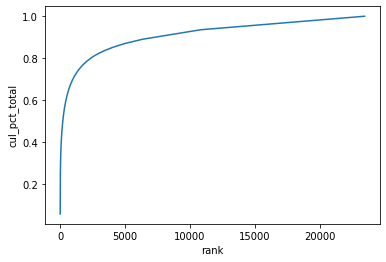

In [39]:
# love this visual

import seaborn as sns

sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [40]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.424583624163809

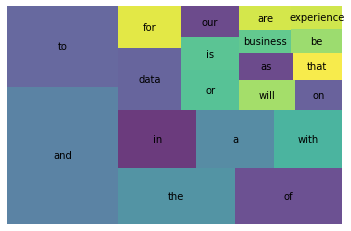

In [44]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [48]:
# term frequency feature matrix

from sklearn.feature_extraction.text import TfidfVectorizer

data = df.description

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,04,10,100,1079302,11,12,125,14,15,...,years,yearthe,yes,yeti,york,young,yrs,zeus,zf,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# tune params

from spacy.tokenizer import Tokenizer

def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

# instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,$,"$ 100,000",$ 300,+,+ city,+ year,+ years\xe2\x80\x99,.\n\nabout,.\n\nabout role\n\nas,.\n\nperks\n\nhealth,...,you\xe2\x80\x99ll partner,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,yrs,|,||
0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.026609,0.0,0.029055,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.183957,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.135861,0.0,0.148350,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
dtm.shape

(426, 10771)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [54]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [55]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.29773639, 1.30512818, 1.3315368 , 1.33613702]]),
 array([[  0, 115, 274, 403, 338]]))

In [56]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[256]])

(array([[0.        , 1.26297941, 1.27333379, 1.27953141, 1.27953141]]),
 array([[256, 201, 410,  23, 123]]))

In [60]:
data[250][:300]

"b'LMI is seeking a data-driven, highly analytic mind for a data scientist position in the Joint Distribution Process Analysis Center (JDPAC) at USTRANSCOM with a mission to provide analysis and engineering support to improve the nation\\'s ability to move and sustain our forces throughout the globe. "

In [62]:
# random job posting
rndm_job_posting = [ """
TATA Technologies has an exciting opportunity for a Digital Fleet Advisor located in Virginia Beach, Virginia. As a Digital Fleet Advisor, you will serve as a digital expert and trusted technical advisor to dealers and customers on agreed basis. This position proactively demonstrates the value by helping customers extract maximum value from their equipment and digital investments through practical application of analytics within their operations & maintenance departments.

Furthermore, the Fleet Advisor acts as the primary focal point of contact to subscription customers, the Fleet Advisor will be responsible for creation of customer value propositions and identification and communication of realized value to the customer using Asset Intelligence and selected customer-facing applications. The expected outcome is greatly enhanced equipment reliability and availability combined with optimized maintenance and technical support that results in the lower cost of ownership for the customer.

Job Duties/Responsibilities may include, but are not limited to:

Responsible for the development of case studies as inputs to understand the value driven by cost avoidance and operations optimization through the use of Asset Intelligence Products and Services across customers as assigned. The FA may be responsible to a single customer and their respective fleet or multiple customers depending on the size and complexity of their operation.
Responsible to monitor fleet performance and lead failure prevention techniques to drive customer operation uptime and reliability improvements.
Utilize an in-depth understanding of the marine industry and customer operations to identify Condition Based Maintenance (CBM) optimization opportunities by using the CAI platform and services to drive value for the customer.
Support Account Managers in the operational rhythm of monthly, quarterly and yearly meetings with customers and their management by providing technical value and case study briefings.
Represent Voice of Customer (VOC) within the dealer network and Asset Intelligence Teams by providing product and service feedback as well as additional opportunities for engagement by dealers such as training, spare parts, run life optimization, etc.
Product and Services Focus:

Identification of customer requirements/needs for engineering and analytics services and developing proposals for value-add projects.
Monitor industry trends, including competitor analysis, and provide direction to the product team to ensure the company remains competitive in the Asset Intelligence space.
Identification of voice of customer enhancement requests and inputting those into the Scaled Agile for Enterprise (SAFe) process.
Data Focus:

Perform regular reviews of customer sites using Asset Intelligence with the goal of improving right-sized maintenance, catastrophic failure avoidance, unplanned downtime and other value levers.
Utilize data analysis, reports and analytics from Asset Intelligence Team Data Scientist’s and Fleet Analyst’s to scale and grow Fleet Advisor value across the monitored fleet.
Interprets equipment data and models, perform investigative actions, clearly documenting the steps to acknowledge and disposition alerts in a timely manner, providing resolution and closure with the dealer/customer.
References technical service literature within Caterpillar to understand latest iron updates that impact product health and customer experience (dealers do this too as part of their normal job).
References engine tracking history in SIMs as appropriate. Uses operational history data to determine accurate equipment health
Typical Day

This is a first shift position. Hours can be flexible.
Resource will be meeting with customers and internal stakeholders to review data.
Education Requirement

Bachelor’s degree in Engineering, Marine Engineering, Engineering Technology, Mathematics and Science
Technical Skills Required

3+ years of experience in heavy industries such as Marine, Power Generation, Transportation or Oil & Gas industries.
Experience utilizing digital software technologies to analyze and understand machinery health
Desired:

Experience in enterprise scaled solutions that deliver real time and historic data efficiently
3+ years of Industrial Analytics experience across multiple industries
Scientific computing experience (e.g. R, Matlab, Python, machine learning, etc).
Experience in complex fleet management IoT solutions
Experience in managing business change, project management methods and tools
Soft Skills Required

Demonstrated strong communication skills articulating complex topics to non-technical audiences
Job Type: Full-time

Salary: $100,000.00 to $120,000.00 /year

Benefits:

Health insurance
Dental insurance
Vision insurance
Retirement plan
Paid time off
Relocation assistance
"""]

In [63]:
new = tfidf.transform(rndm_job_posting)

In [64]:
new

<1x10771 sparse matrix of type '<class 'numpy.float64'>'
	with 300 stored elements in Compressed Sparse Row format>

In [65]:
nn.kneighbors(new.todense())

(array([[1.24914467, 1.26823581, 1.27893648, 1.27896689, 1.28184597]]),
 array([[103, 404, 237, 293,  36]]))

In [66]:
# most relevant
data[103]

'b"Customer Facing Data Scientists (CFDSs) are critical to making our customers successful. An ideal CFDS candidate should have strong fundamentals of applied data science in business setting, and should enjoy communicating and evangelizing data science solutions to business stakeholders.\\n\\nRoles and responsibilities :\\n\\nProduct\\nRepresenting the DataRobot product from a technical standpoint to customers - including demonstrations, conducting proof-of-concept trials, helping clients evaluate success criteria, and training users\\nProviding the customer\'s point of view to DataRobot\'s Product team, informing the direction of future product feature development\\nData Science\\nEnabling customers to solve complex data science problems using DataRobot - including problem framing, data preparation, model building, model deployment, model management, and output consumption\\nIn some cases, executing data science workflows for customers\\nProviding data science knowledge and expertise

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 